#### The goal of project is to help classify wether a particle is a gamma particle or hadron from telestope data attributes. This is supervised learning because we know te labelled output.

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

@misc{misc_magic_gamma_telescope_159,
  author       = {Bock,R.},
  title        = {{MAGIC Gamma Telescope}},
  year         = {2007},
  howpublished = {UCI Machine Learning Repository},
  note         = {{DOI}: https://doi.org/10.24432/C52C8B}
}

In [185]:
#loading data

cols = ["fLength", "fWidth", "fSize", "fConc", "fConcl", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
#Reading he data file into the notebook
data = pd.read_csv("data/magic04.data", names=cols) # The 'names=cols' part allows us to rename the column to what we specified in cols array.
data

fLength    fWidth   fSize   fConc  fConcl     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
0       -8.2027  40.0920   81.8828     g  
1       -9.9574   6.3609  205.2610     g  
2      -45.2160  76.9600  256.7880     g  
3       -7.1513  10.4490  116.7370     g  
4       21.8393   4.6480  356.4620     g  
...         ...      ...       ...   ...  
19015    2.8766   2.4229  106.8258     h  
19016   -2.9632  86.7975  247.4560     h  
19017   -9.4662  30.2987  256.5166     h  
19018  -63.8389  84.6874  408.3166     h  
19019   31.4755  52.7310  272.3174     h  

[19020 rows x 11 columns]

In [186]:
#Computers are not so good at reading text so we can convert the h and g into binaries (1's and 0's) instead since there are only two classifications for our prediction (binary classificcation)

data["class"] = (data["class"] == "g").astype(int) # converts the the g and h into 1's and 0's

In [187]:

data.head()

fLength    fWidth   fSize   fConc  fConcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

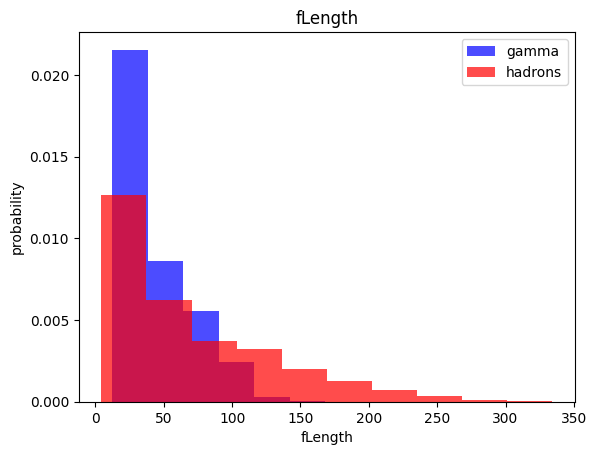

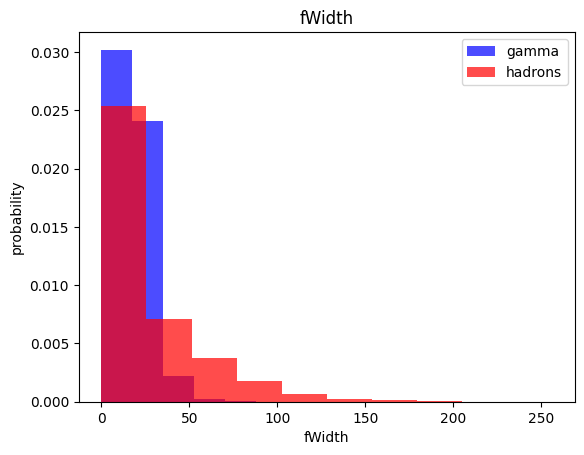

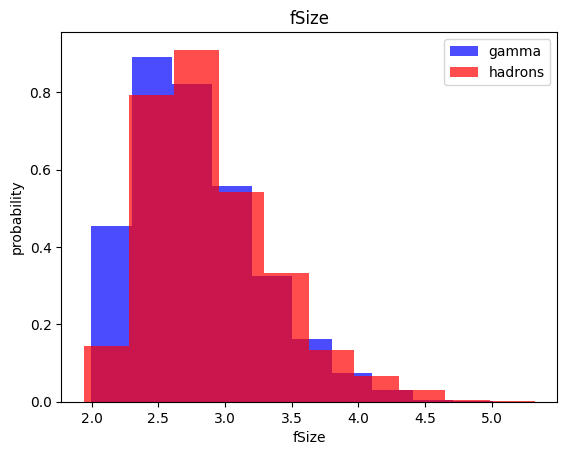

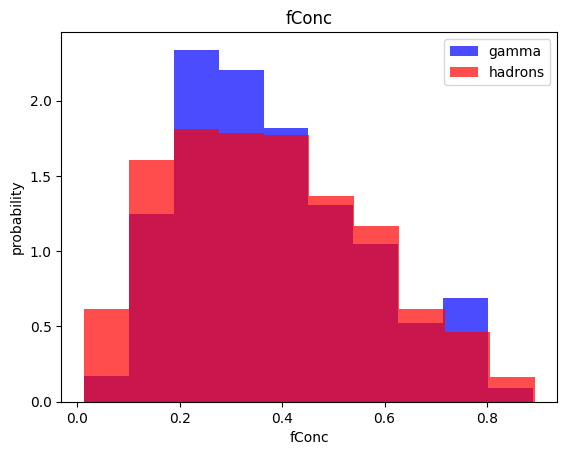

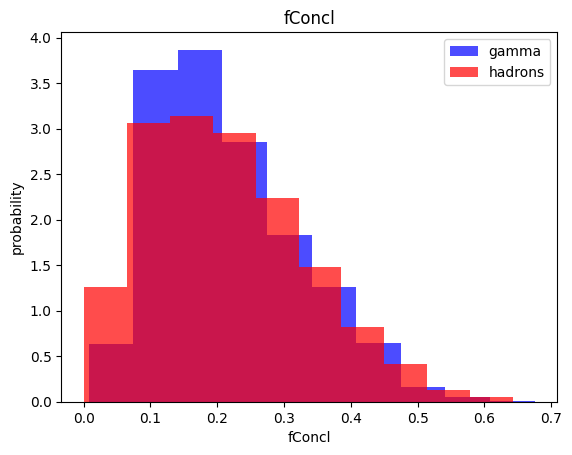

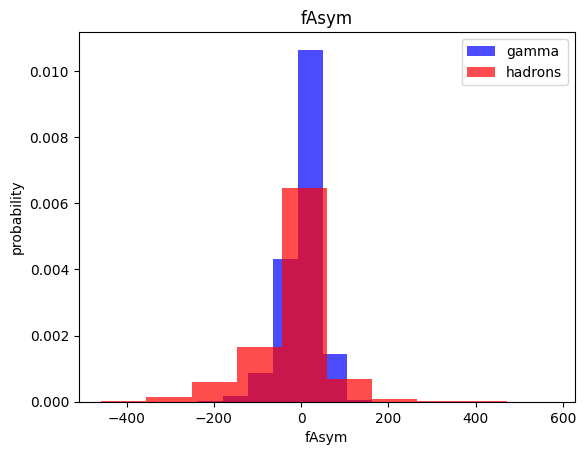

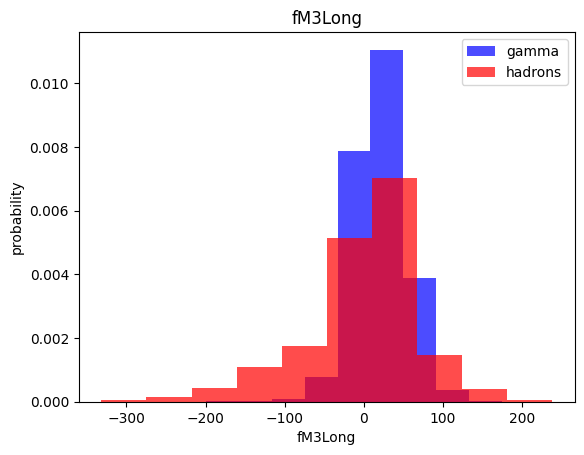

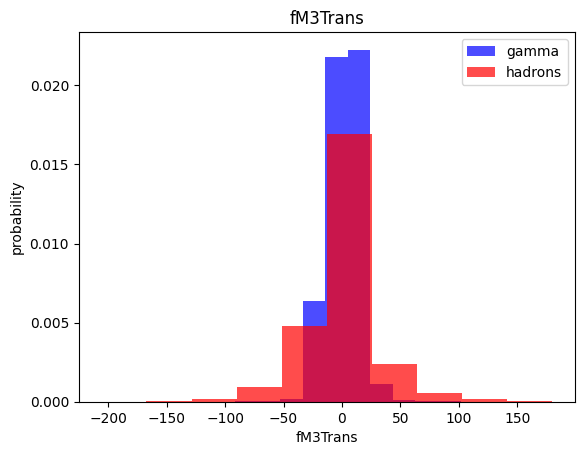

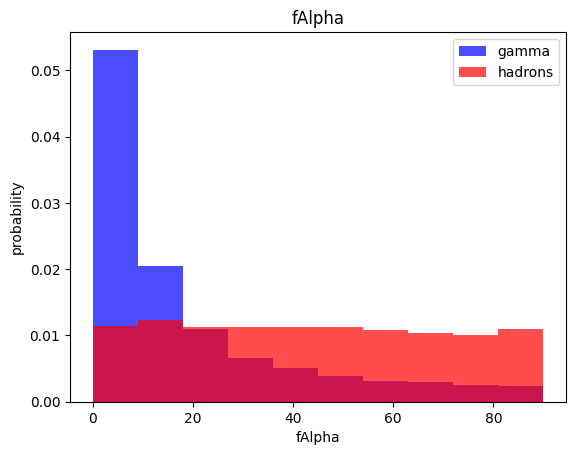

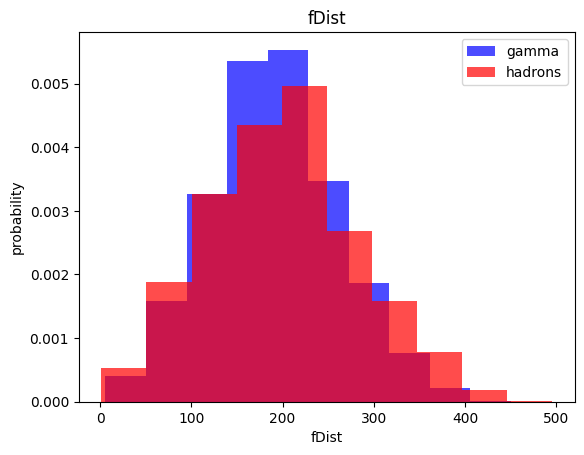

In [188]:
#plotting the individual data colums against the class column to visualise any obvious relationships between the particle classification and specific attribute

for label in cols[:-1]: # For all the column labels in the data apart from the last column ([:-1])...
    plt.hist(data[data["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(data[data["class"]==0][label], color='red', label='hadrons', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend() 
    plt.show() #Shows plot

In [189]:
# Creating the training, validation and test data

training, validation, test = np.split(data.sample(frac=1), [int(0.6*len(data)), int(0.8*len(data))]) 
# The .sample method shuuffles the data to avoid biases

In [190]:
# Due to the data scales for each column varying a lot, we can scale the values in relation to the mean of all column values and standard deviation. This way all columns will have be of similar scale.

def scale_data(data, oversample=False):
    X = data[data.columns[:-1]].values # Gets all the values in the data except the last column of values 
    y = data[data.columns[-1]].values # Gets the last column of values in the data 'class'
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X) #This takes X and fits the standard scalar to transforming all the values and making them the new X values
    
    # The code below oversamples the data of which is lesser represented and keeps sampling from that data until both X and y data are represented in teh training data equaly
    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)

    # horizontally stacks the X data arrays and Y data arrays next to each other.
    data = np.hstack((X, np.reshape(y, (-1, 1))))# the np.reshape is used because the Y column only contains one dimension of data whilst the X column contiins two. We reshape the Y dta arrays to contain 2 dimensions.
    return data, X, y

In [191]:
print(len(training[training["class"]==1]))  # All the gammas in the training data
print(len(training[training["class"]==0]))  # All the hadrns in the training data

7338
4074







When running the cell above, you can see that there are a lot more gamma particles than hadrons. This will become an issue, so we want to over sample our data so we have around an equal ammount of each in the training dataset. 

In [192]:
# After oversampling

training, X_training, y_training = scale_data(training, oversample=True) # using the function with oversampling set to True

print(len(y_training))
print(sum(y_training == 1))
print(sum(y_training == 0))

14676
7338
7338


Now the split between gamma and hadrons in our training data is balanced.

In [193]:
# We don't want to oversample for our validation and test datasets because they may not be equally represented in a random set of data.

validation, X_validation, y_validation = scale_data(validation, oversample=False) # Scaling the data for the validation dataset
test, X_test, y_test = scale_data(test, oversample=False) # Scaling the data for the test dataset

 ## Using a KNN (K-nearest neighbour) Model



 

In [194]:
#Importing KNN model package.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report # Allows us to produce a classification report

In [195]:
#This cell plots the and y data for us and then 

knn_model = KNeighborsClassifier(n_neighbors=20) #number of neighbors (There are hyperperameters you can tinker with for logistic regression models to increase the models peformance)
knn_model.fit(X_training,y_training) # This plots the data points on a multidimensional plot with the axis being all the X data attributes.

KNeighborsClassifier(n_neighbors=20)

In [196]:
# Making y predictions based off the new X test datapoints but into the multidimensional plot. 

y_predictions = knn_model.predict(X_test)
print(y_predictions)

[1 1 0 ... 1 1 1]


In [197]:
# Compare the predicted values against the true (truth) values

print(y_test)

[1 1 1 ... 1 1 1]


We can see that the model predicted 5/6 of the values correctly.


In [198]:
# Gettinf a classification report for the KNN model applied




This shows us that the accuracy is 82% (The percentage of the whole which was predicted correctly)

Precision refers to the percentage of actual true positives out of the total positives predicted by the model.

Recall refers to the precetage of total true positives which the model correctly predicted.

## Using Naive Bayes Model

Naive Bayes is an approximation of bayes rule expanded to classification. The probability of a particular classification given a set of variable values. The sets of variables are assumed to be independent, and the probability of all the variables is constant.

In [199]:
# Importing Gaussian Naive Bayes model package

from sklearn.naive_bayes import GaussianNB

In [200]:
# Fitting the x and y training data to the Naive Bayes model

nb_model = GaussianNB() #There are hyperperameters you can tinker with for logistic regression models to increase the models peformance
nb_model = nb_model.fit(X_training, y_training)

In [201]:
# Applying and using the model as well as showing the classification report

y_predictions = nb_model.predict(X_test)
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.67      0.42      0.52      1334
           1       0.74      0.89      0.81      2470

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



As you can see, the   accuracy, prediction and recall all indicate that this model performs worse than the KNN model.

## Using Logistic Regression

Logistic regression is where we try to fit our data to the ***sigmoid function S()=1/1+e^(-y)***

- If we have one feature of x (x1) then its simple logistic regression.

- If we have more than one feature of x (x1, x2, x3,...) then its multiple logistic regression.

In [202]:
# Importing Gaussian Logistic Regression model package

from sklearn.linear_model import LogisticRegression

In [203]:
# Fitting our data to the Logistic regression model

lg_model = LogisticRegression() #There are hyperperameters you can tinker with for logistic regression models to increase the models peformance
lg_model = lg_model.fit(X_training, y_training)

In [204]:
# Applying and using the model as well as showing the classification report

y_predictions = lg_model.predict(X_test)
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1334
           1       0.84      0.82      0.83      2470

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



You can see that this model performs better than the previous Naive Bayes model, but not as wels as the KNN model.

## Using Support Vector Machines Model

#### Example 1:

The goal of the Support Vector Machine (SVM) model is to find a line/hyper-plane between the plotted classification labels that best divides the data in two (1 and 0 / gamma and hadron) where everyhthing on one side is one classification label and everything on the other side is a the alternatice classiification label. The hyper-plane is the SVM model.

Not only do we want the data to be seperated well, but we want the SVM margins for both classificaation sides to be equal (The hyper-plane should be equadistant from both data classifications). 

The data-points that lay on thr margin lines are called *support-vectors*

#### Example 2:

If we have data in a single plane and mixed (such as all on the x = 0 axis) then we cannot use a line to seperate them. What we can do is set plot the data on a new plot where one axis is the x0 (original x values) and the other is x1 (nex x values after putting them through an function of x). This will seperate out the datapoints allowing for a hyper-plane to used to divide them. This transformation of data points id known as the **kernel trick**.

In [205]:
# Importing SVM model package

from sklearn.svm import SVC

In [206]:
# Fitting our data to the Logistic regression model

svm_model = SVC() #There are hyperperameters you can tinker with for logistic regression models to increase the models peformance
svm_model = svm_model.fit(X_training, y_training)

In [207]:
# Applying and using the model as well as showing the classification report

y_predictions = svm_model.predict(X_test)
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1334
           1       0.89      0.89      0.89      2470

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



As you can see, this model provides the best accuracy, precision and recall out of all the models above

## Using Neural Network Model

A neural network take input values (x1, x2, x3, x4...) and weighs the values based on the weights of nodes within the hidden layer of the mode where the values are fed to (basically multiplies the values with the weights). The sum of all the input and weight multiplications go into a neuron which then has a bias applied to it before being passed through an **activation function** and then output.

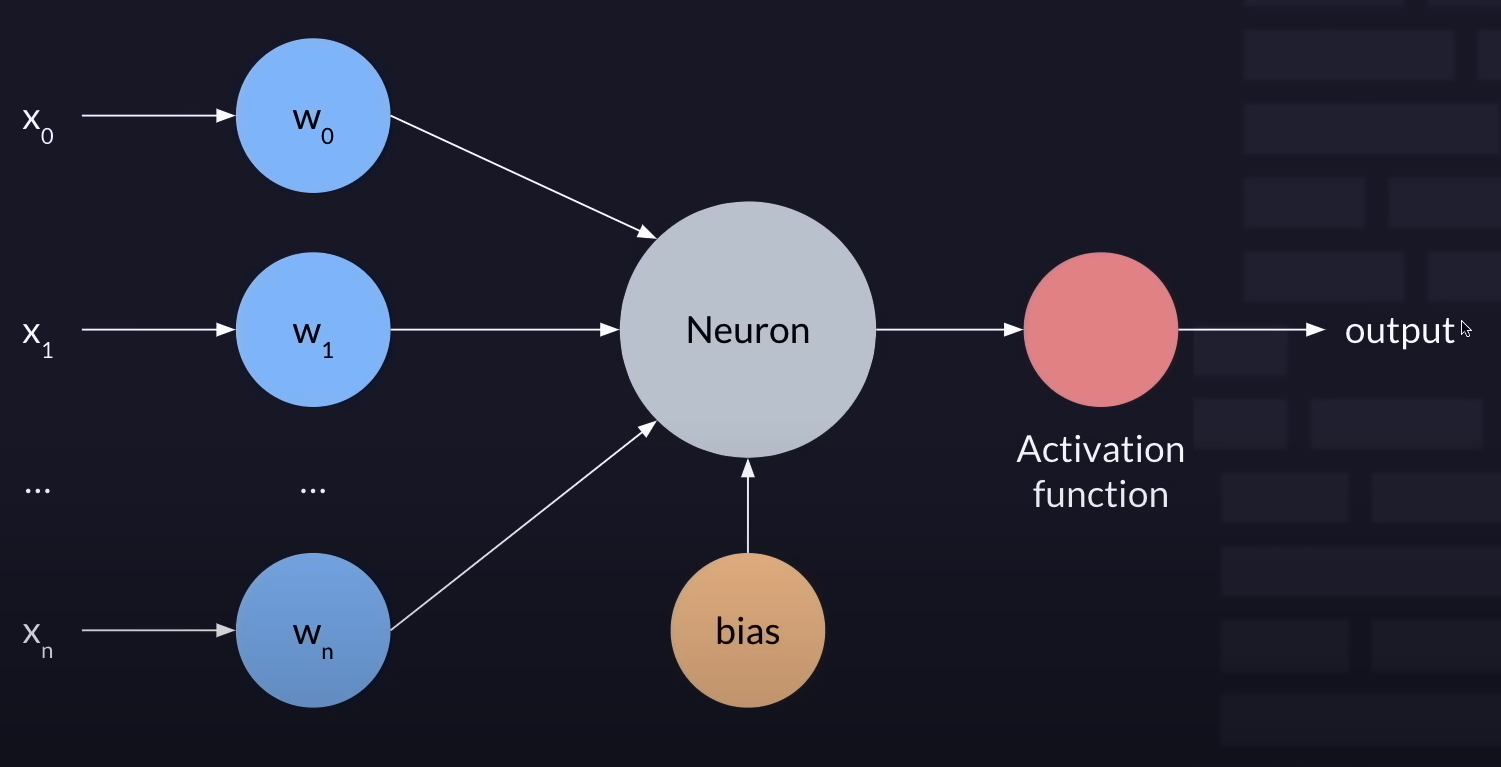

#### Activation function:

If all the arrows in a neural network represented an addition (linear addition) then the final output would be able to be summarised as in one linear combination/function which defeats the purpose of having all the layers in the neural network, o without an activation fuction the modell just becomes a linear model. Instead the activation functions (Sigmoid, Tanh and ReLU) are used the outputs of neurons non-linear in order for the modell to not collapse into a linear one.

#### Training:

A neural network must be trained and in order to do so, you must train it on some data and then feed the loss of the model back into itself thne make adjutments to the model so it can contiue training to decrease that loss and in turn the predicted output. The loss is essentially the difference between the model predictions and the real world expectaion.

##### What goes on during the training (Backpropagation)?

During training, a loss function is applied and (L1 or L2). and gradient descent is used figure out to what extent a neuron weight value is contributing to the total loss of the model and adjust the weight/back step in order to bring the loss down.

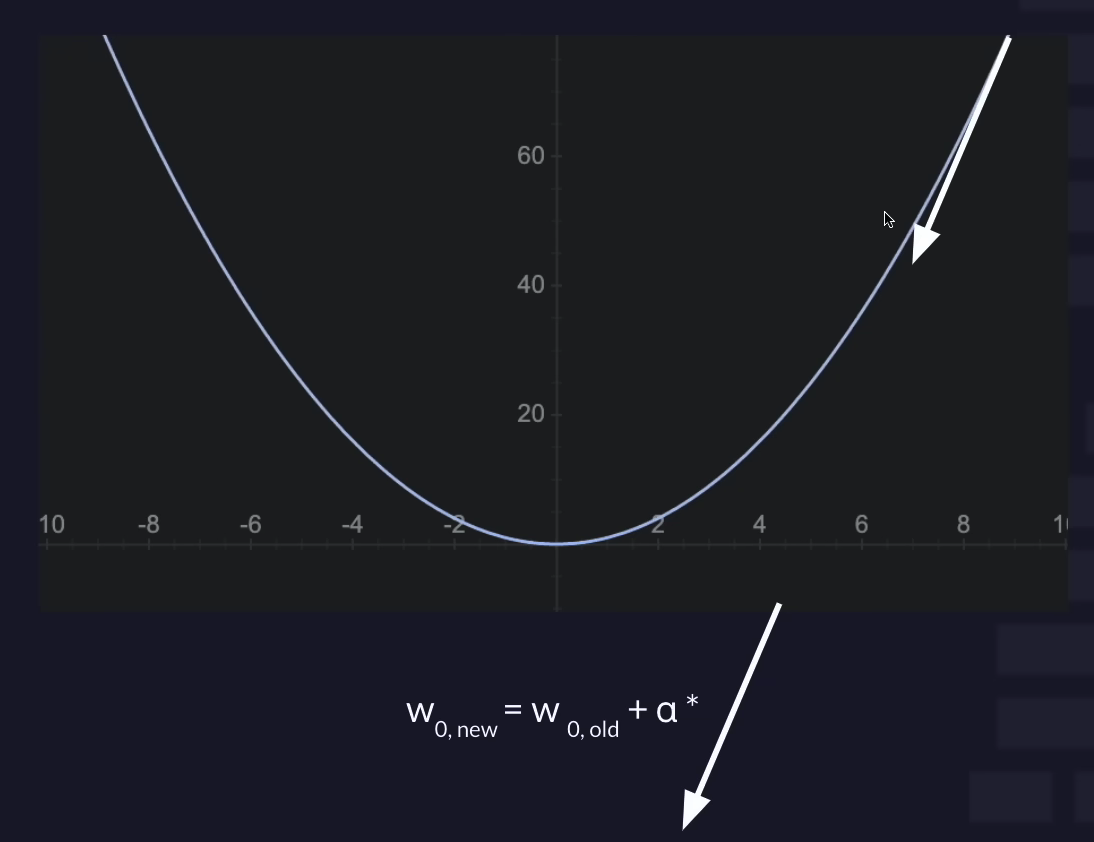

alpha is the learning rate which sets how big or little steps we take for each decent step in our gradient descent. This will ultimately determine how long it takes for out=r neural network to converge or even diverge if the learning rate is set too high.

In [238]:
# For neural networks we can use the tensorflow package which allows us to not have to code a neural network from scratch.

import tensorflow as tf

In [258]:
# Displaying the plot of our models loss and accuracy over epochs

def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) # This says that we want 1 row and 2 columns in that row when displaying the plots
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.show()

In [259]:
# Creating the neural network model using tensorflow.

# Initial training method
'''
nn_model = tf.keras.Sequential([ #This line tells tensorflow to layer everything thats gonna be passed in as a sequentail model
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)), # Need to define input shape for firts layer so the input shape watches the shape of the input data.
    tf.keras.layers.Dropout(0.2), # Adding dropout layers randomly sets inputs of some nodes to 0 in order to prevent the model from overfitting to the training data. 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid'), # By making our final layer use a sigmoid activation funtion, we allow our predictions to either be a zero or a one like in Logistic Regression.
])
'''
#Initial optimiser
'''
# With tesnorflow we need have to compile the model we've created.
nn_model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy']) # We can choose which optimisation algorithm to use (Adam inthis case) along wiht the learning rate (0.001) in this case. We can also log metrics of the model which we can use later on.
'''
# Training using function instead
def training_model(X_training, y_training, num_nodes, dropout_prob, learning_rate, batch_size, epochs):
    nn_model = tf.keras.Sequential([ #This line tells tensorflow to layer everything thats gonna be passed in as a sequentail model
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)), # Need to define input shape for firts layer so the input shape watches the shape of the input data.
    tf.keras.layers.Dropout(dropout_prob), # Adding dropout layers randomly sets inputs of some nodes to 0 in order to prevent the model from overfitting to the training data. 
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid'), # By making our final layer use a sigmoid activation funtion, we allow our predictions to either be a zero or a one like in Logistic Regression.
    ])
    
    # New optimiser using trainingloop function
    nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy']) # We can choose which optimisation algorithm to use (Adam inthis case) along wiht the learning rate (0.001) in this case. We can also log metrics of the model which we can use later on.
    
    #Training model inside function
    history = nn_model.fit(
    X_training, y_training, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0# We can adjust hyperparemeters here to improve the performance of the model
    ) 
    
    return nn_model, history

In [260]:
# Fitting our training data to the model
'''
# The epochs refers to how many training cycles we will do, batch_size refers to... andn the validation split is the percentage of our training/input data will be used as validation data.
history = nn_model.fit(
    X_training, y_training, epochs=100, batch_size=32, validation_split=0.2 # We can adjust hyperparemeters here to improve the performance of the model
)
'''

'\n# The epochs refers to how many training cycles we will do, batch_size refers to... andn the validation split is the percentage of our training/input data will be used as validation data.\nhistory = nn_model.fit(\n    X_training, y_training, epochs=100, batch_size=32, validation_split=0.2 # We can adjust hyperparemeters here to improve the performance of the model\n)\n'

In [261]:
#plot_loss(history)
#plot_accuracy(history)

A you can see from these plots, over time/epochs the training and val loss stadily decrease and the accuracy steadily increases. The valodation loss in higher than the training loss because the model is adapting to teh training data more and more as it trains, but not the validation data so it will not perform as well on it. Same thing for the accuracy but now its increasing.

### Fine-Tuning:

Parameters such as the batch size, number of layers, number of neurons in each layer, activation functions in each layer and much more can be changed in order to make the model perform better.

16 nodes, dropout 0, learning rate 0.01, batch size 32


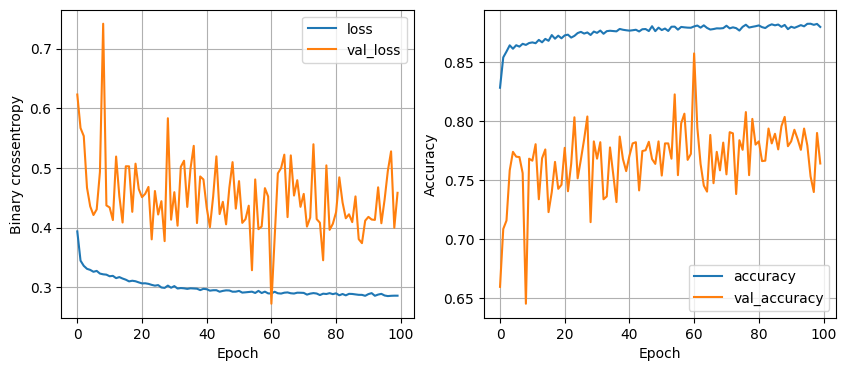

119/119 [==============================] - 0s 1ms/step - loss: 0.2986 - accuracy: 0.8796
16 nodes, dropout 0, learning rate 0.01, batch size 64


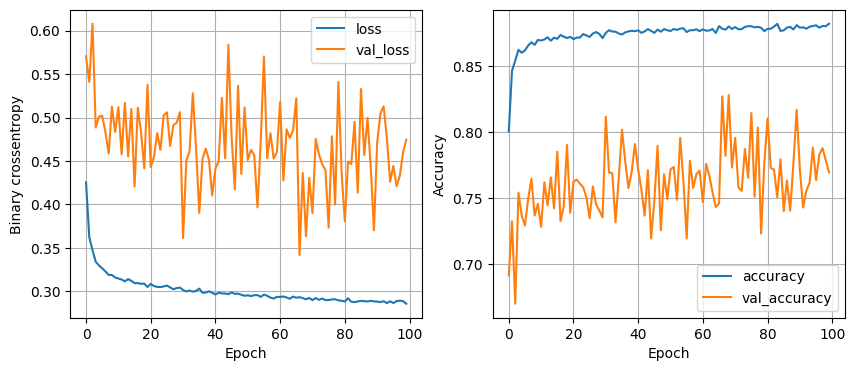

119/119 [==============================] - 0s 1ms/step - loss: 0.2938 - accuracy: 0.8757
16 nodes, dropout 0, learning rate 0.01, batch size 128


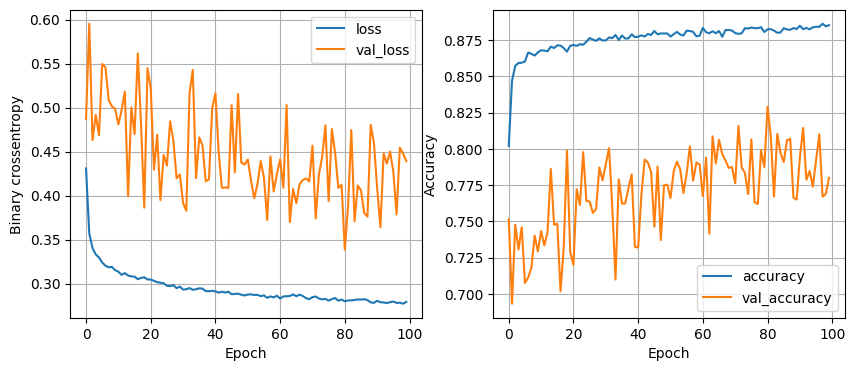

119/119 [==============================] - 0s 1ms/step - loss: 0.2936 - accuracy: 0.8780
16 nodes, dropout 0, learning rate 0.005, batch size 32


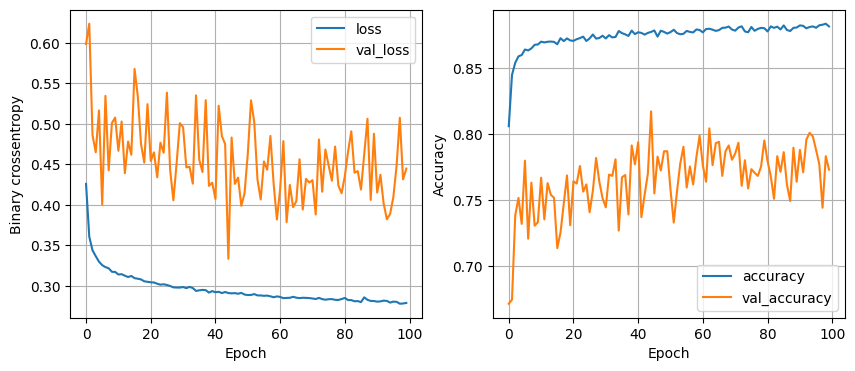

119/119 [==============================] - 0s 1ms/step - loss: 0.2991 - accuracy: 0.8791
16 nodes, dropout 0, learning rate 0.005, batch size 64


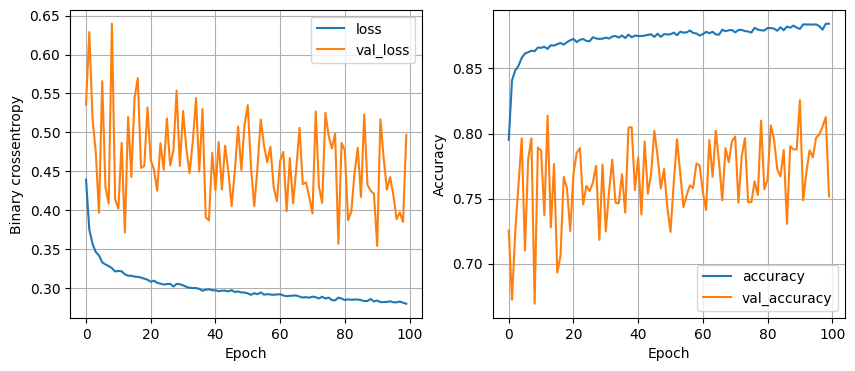

119/119 [==============================] - 0s 1ms/step - loss: 0.2925 - accuracy: 0.8775
16 nodes, dropout 0, learning rate 0.005, batch size 128


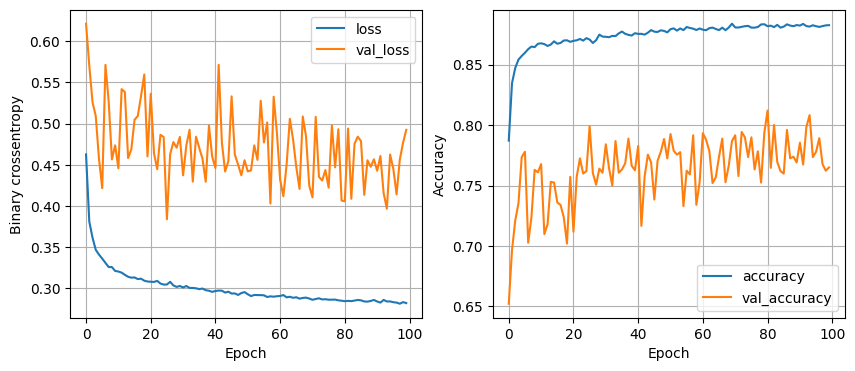

119/119 [==============================] - 0s 1ms/step - loss: 0.2968 - accuracy: 0.8833
16 nodes, dropout 0, learning rate 0.001, batch size 32


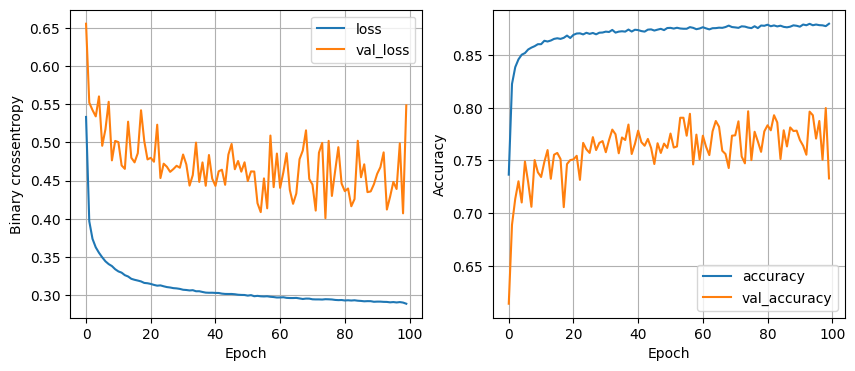

119/119 [==============================] - 0s 1ms/step - loss: 0.2901 - accuracy: 0.8807
16 nodes, dropout 0, learning rate 0.001, batch size 64


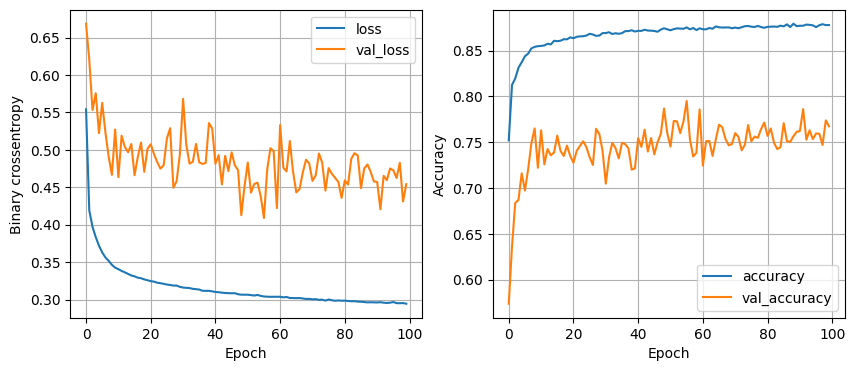

119/119 [==============================] - 0s 2ms/step - loss: 0.2951 - accuracy: 0.8801
16 nodes, dropout 0, learning rate 0.001, batch size 128


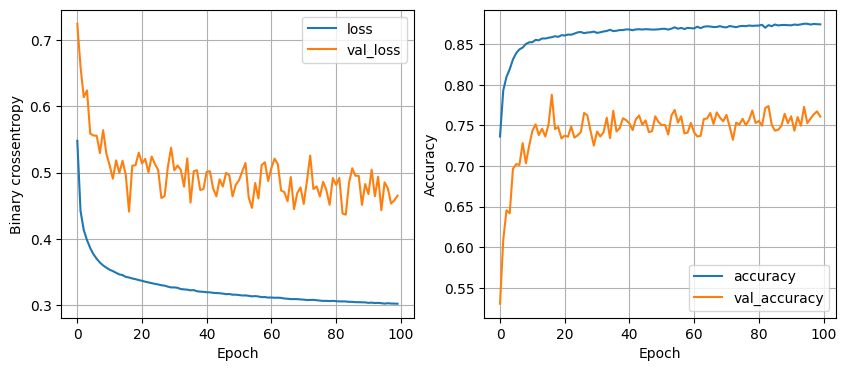

119/119 [==============================] - 0s 1ms/step - loss: 0.2971 - accuracy: 0.8767
16 nodes, dropout 0.2, learning rate 0.01, batch size 32


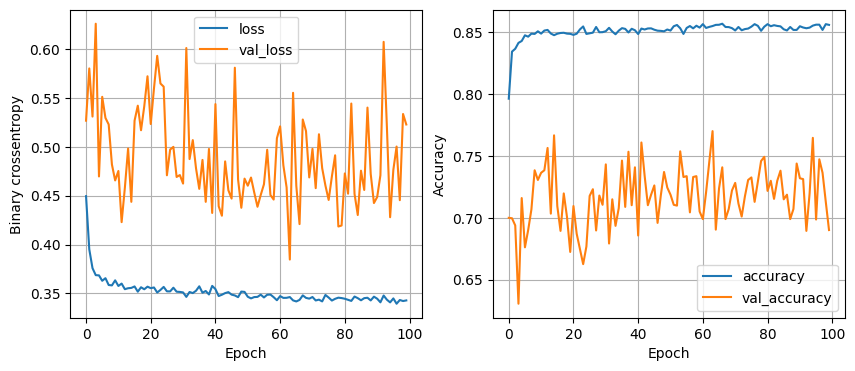

119/119 [==============================] - 0s 1ms/step - loss: 0.3107 - accuracy: 0.8701
16 nodes, dropout 0.2, learning rate 0.01, batch size 64


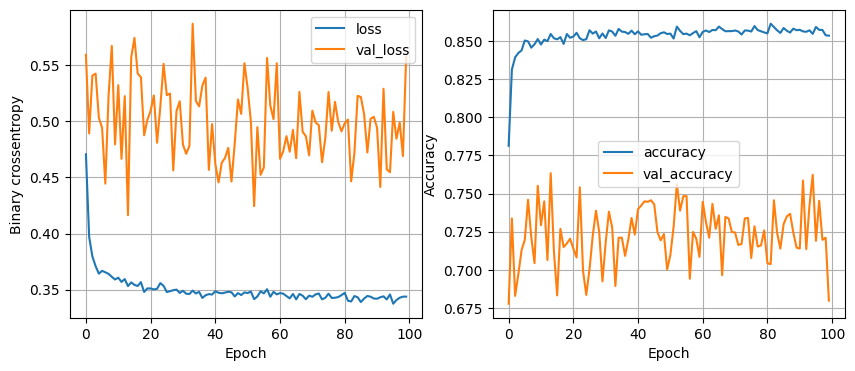

119/119 [==============================] - 0s 1ms/step - loss: 0.3102 - accuracy: 0.8638
16 nodes, dropout 0.2, learning rate 0.01, batch size 128


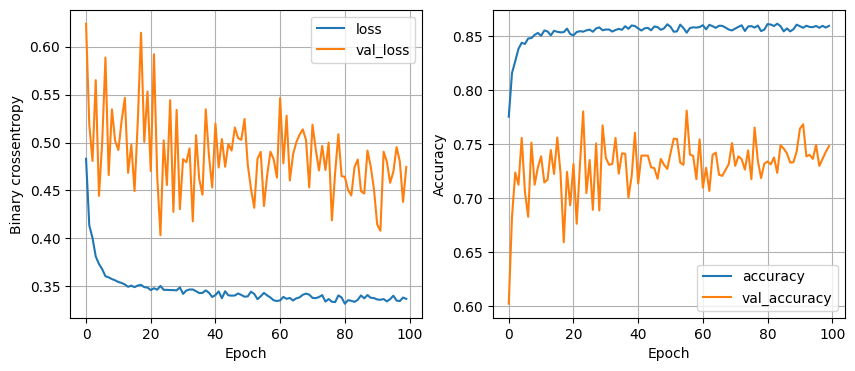

119/119 [==============================] - 0s 1ms/step - loss: 0.2984 - accuracy: 0.8762
16 nodes, dropout 0.2, learning rate 0.005, batch size 32


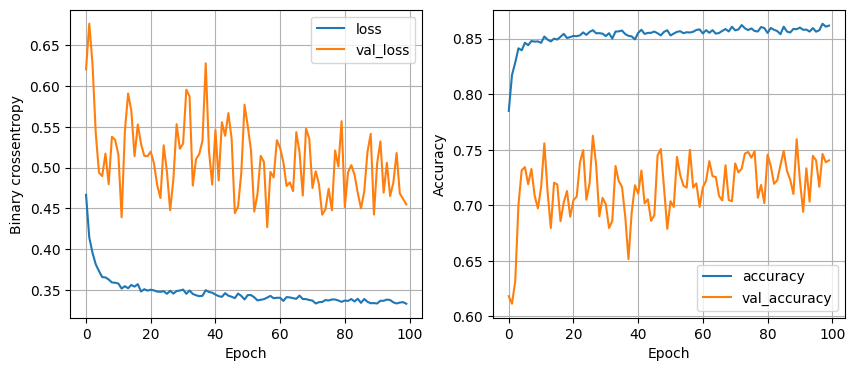

119/119 [==============================] - 0s 1ms/step - loss: 0.3059 - accuracy: 0.8751
16 nodes, dropout 0.2, learning rate 0.005, batch size 64


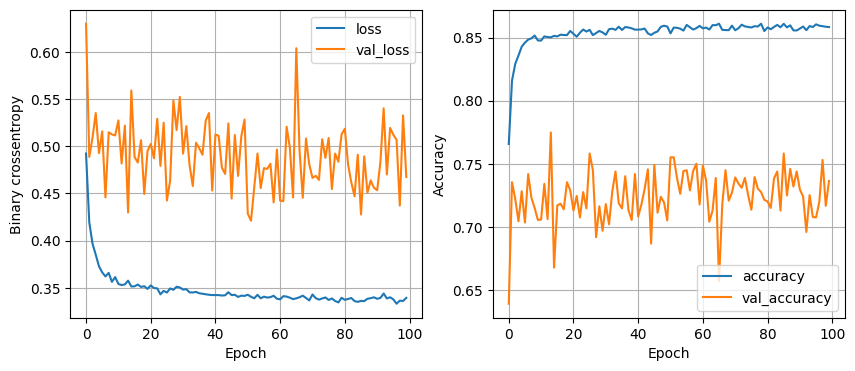

119/119 [==============================] - 0s 1ms/step - loss: 0.3062 - accuracy: 0.8754
16 nodes, dropout 0.2, learning rate 0.005, batch size 128


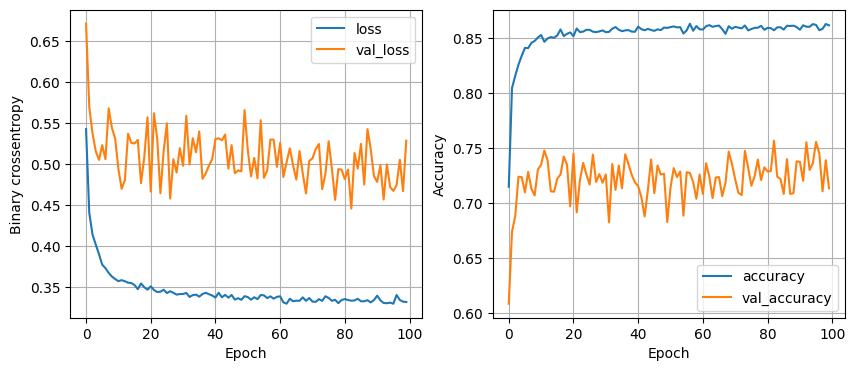

119/119 [==============================] - 0s 1ms/step - loss: 0.3029 - accuracy: 0.8683
16 nodes, dropout 0.2, learning rate 0.001, batch size 32


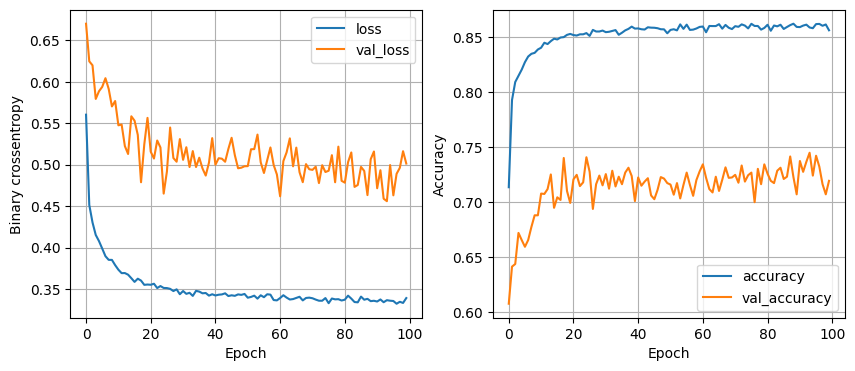

119/119 [==============================] - 0s 1ms/step - loss: 0.3020 - accuracy: 0.8733
16 nodes, dropout 0.2, learning rate 0.001, batch size 64


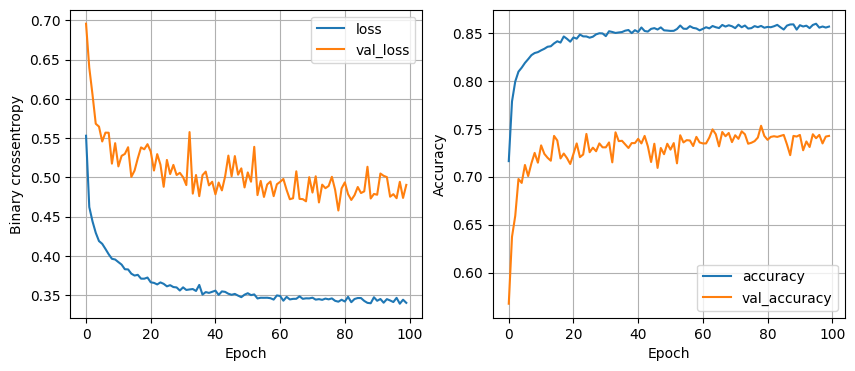

119/119 [==============================] - 0s 1ms/step - loss: 0.3033 - accuracy: 0.8730
16 nodes, dropout 0.2, learning rate 0.001, batch size 128


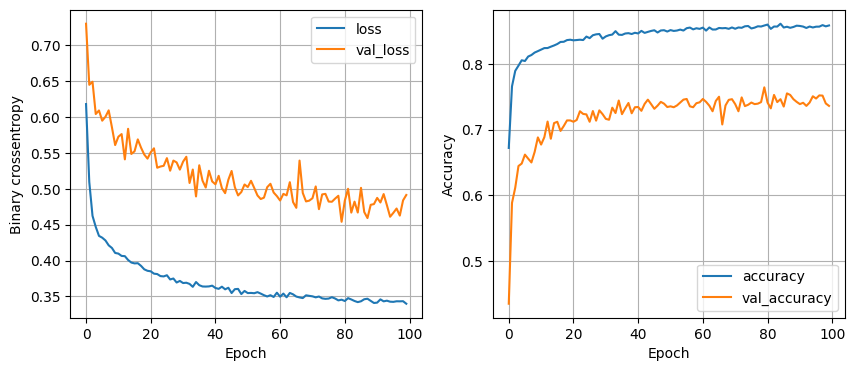

119/119 [==============================] - 0s 1ms/step - loss: 0.3030 - accuracy: 0.8764
32 nodes, dropout 0, learning rate 0.01, batch size 32


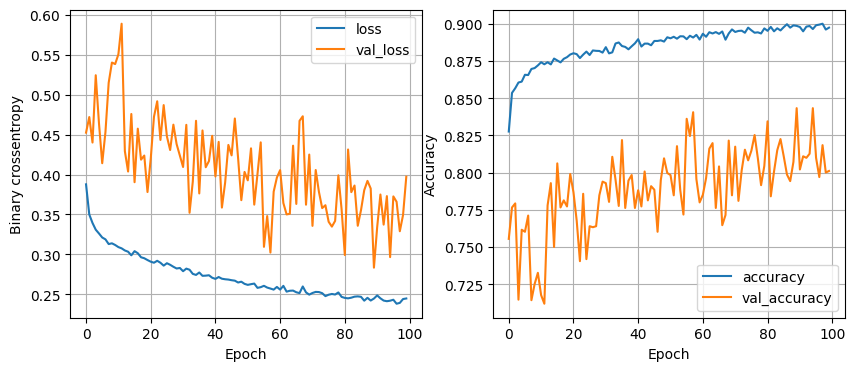

119/119 [==============================] - 0s 1ms/step - loss: 0.3365 - accuracy: 0.8767
32 nodes, dropout 0, learning rate 0.01, batch size 64


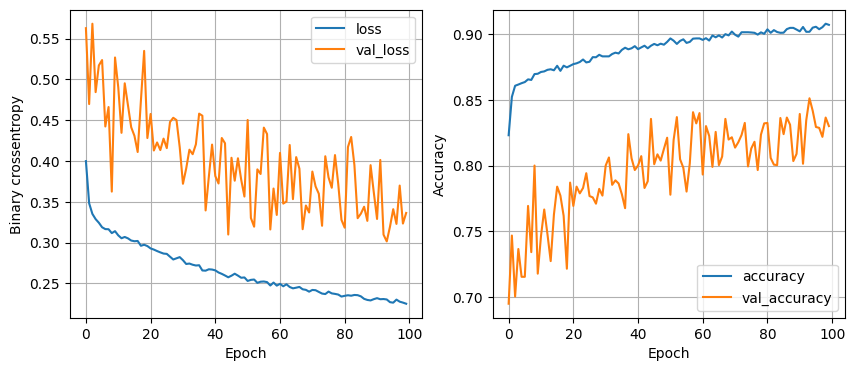

119/119 [==============================] - 0s 1ms/step - loss: 0.3445 - accuracy: 0.8696
32 nodes, dropout 0, learning rate 0.01, batch size 128


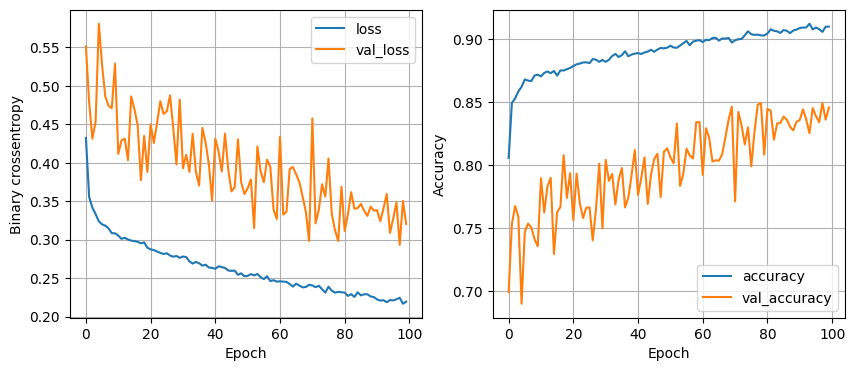

119/119 [==============================] - 0s 987us/step - loss: 0.3664 - accuracy: 0.8651
32 nodes, dropout 0, learning rate 0.005, batch size 32


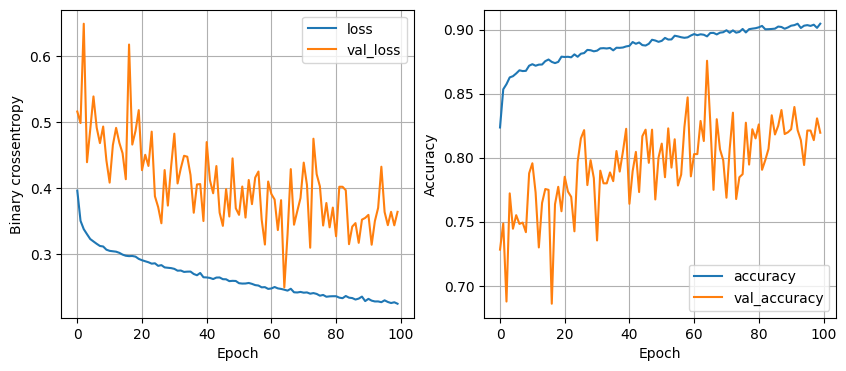

119/119 [==============================] - 0s 1000us/step - loss: 0.3607 - accuracy: 0.8601
32 nodes, dropout 0, learning rate 0.005, batch size 64


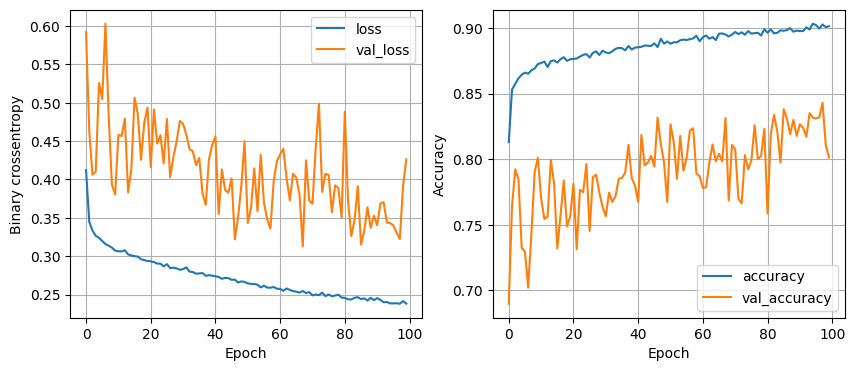

119/119 [==============================] - 0s 998us/step - loss: 0.3383 - accuracy: 0.8725
32 nodes, dropout 0, learning rate 0.005, batch size 128


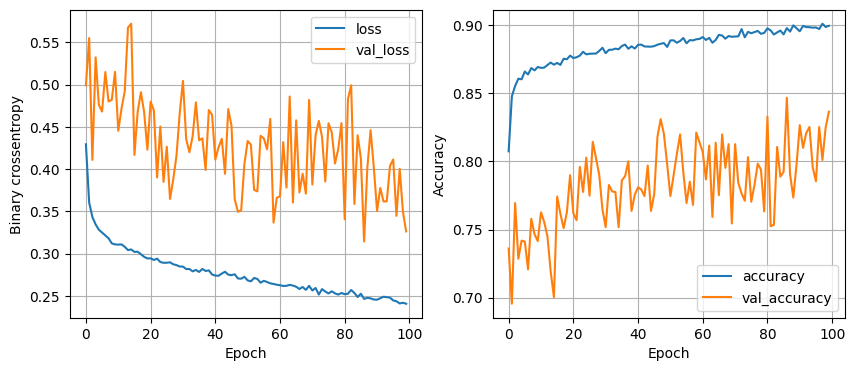

119/119 [==============================] - 0s 1ms/step - loss: 0.3321 - accuracy: 0.8693
32 nodes, dropout 0, learning rate 0.001, batch size 32


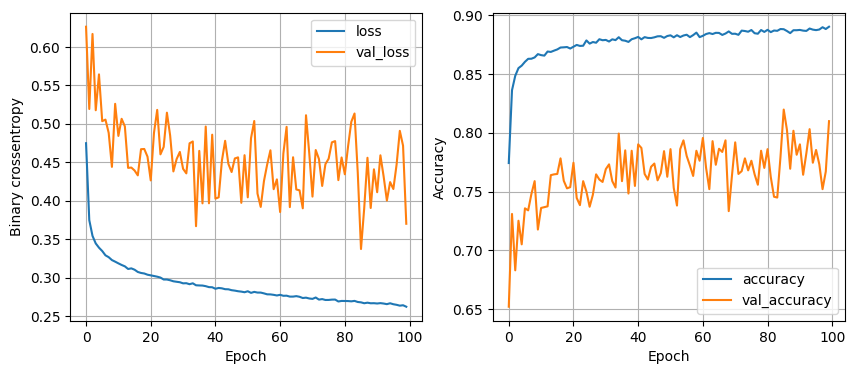

119/119 [==============================] - 0s 1ms/step - loss: 0.3108 - accuracy: 0.8733
32 nodes, dropout 0, learning rate 0.001, batch size 64


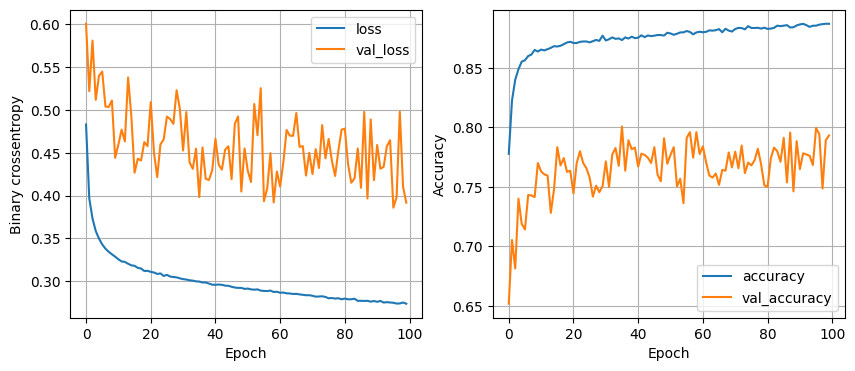

119/119 [==============================] - 0s 962us/step - loss: 0.3020 - accuracy: 0.8762
32 nodes, dropout 0, learning rate 0.001, batch size 128


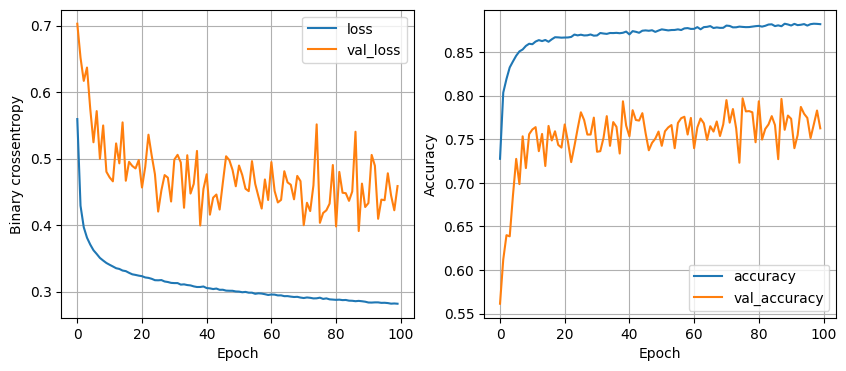

119/119 [==============================] - 0s 951us/step - loss: 0.2973 - accuracy: 0.8796
32 nodes, dropout 0.2, learning rate 0.01, batch size 32


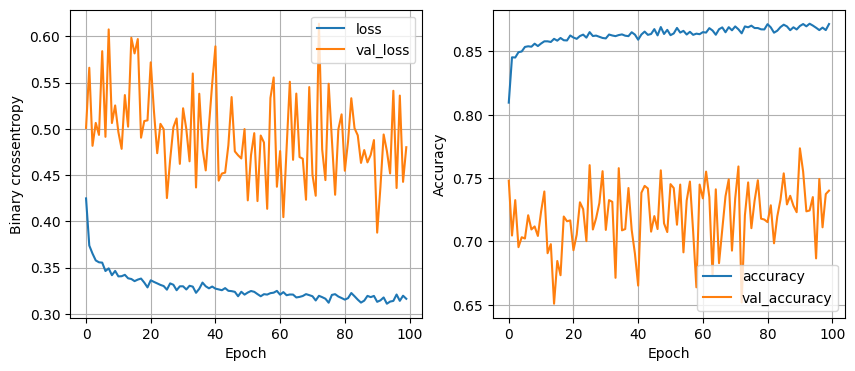

119/119 [==============================] - 0s 952us/step - loss: 0.2888 - accuracy: 0.8799
32 nodes, dropout 0.2, learning rate 0.01, batch size 64


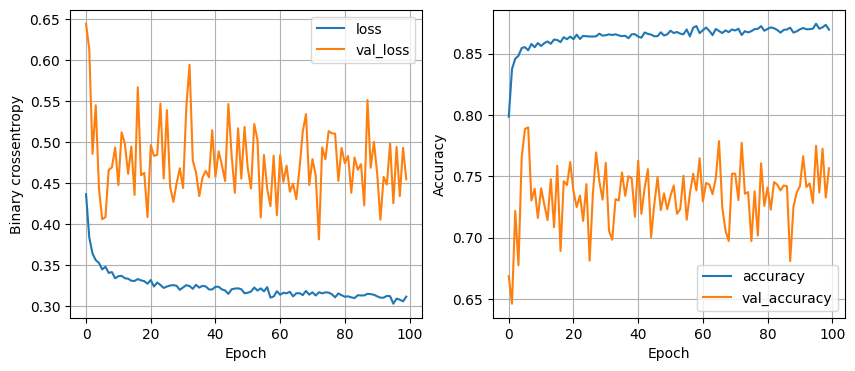

119/119 [==============================] - 0s 951us/step - loss: 0.2939 - accuracy: 0.8764
32 nodes, dropout 0.2, learning rate 0.01, batch size 128


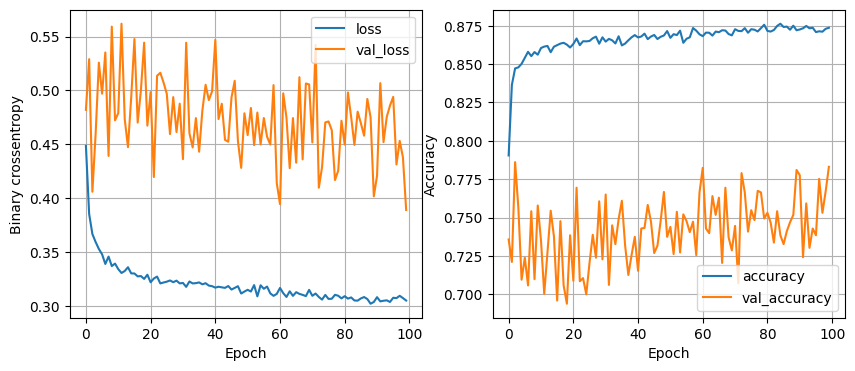

119/119 [==============================] - 0s 960us/step - loss: 0.2931 - accuracy: 0.8793
32 nodes, dropout 0.2, learning rate 0.005, batch size 32


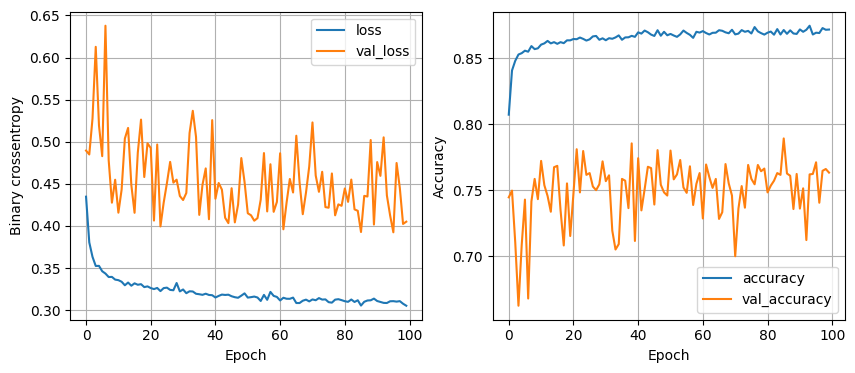

119/119 [==============================] - 0s 1ms/step - loss: 0.2953 - accuracy: 0.8851
32 nodes, dropout 0.2, learning rate 0.005, batch size 64


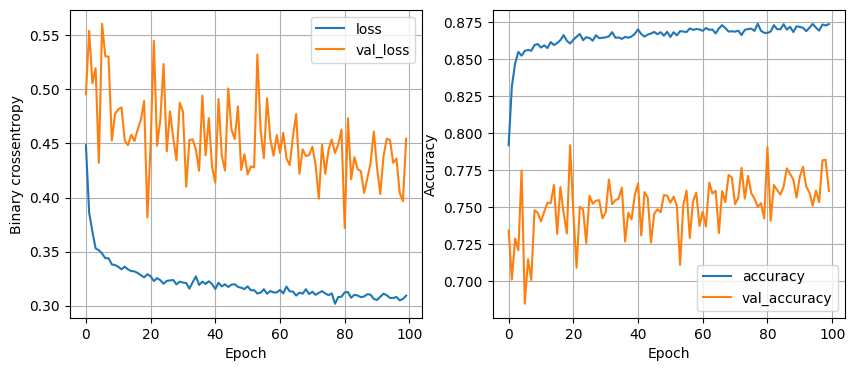

119/119 [==============================] - 0s 1ms/step - loss: 0.2920 - accuracy: 0.8780
32 nodes, dropout 0.2, learning rate 0.005, batch size 128


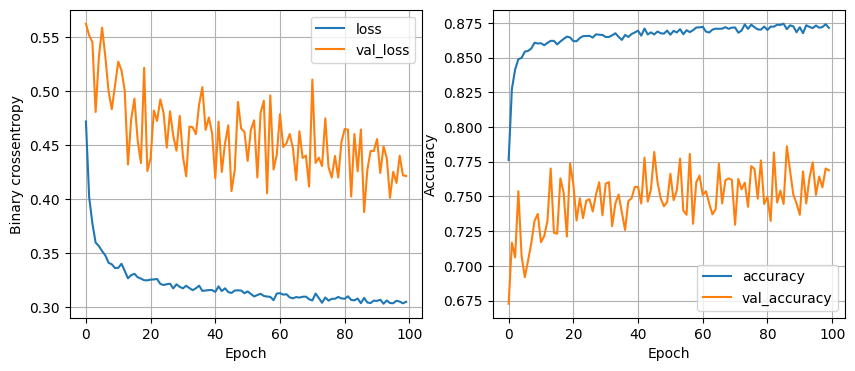

119/119 [==============================] - 0s 988us/step - loss: 0.2929 - accuracy: 0.8825
32 nodes, dropout 0.2, learning rate 0.001, batch size 32


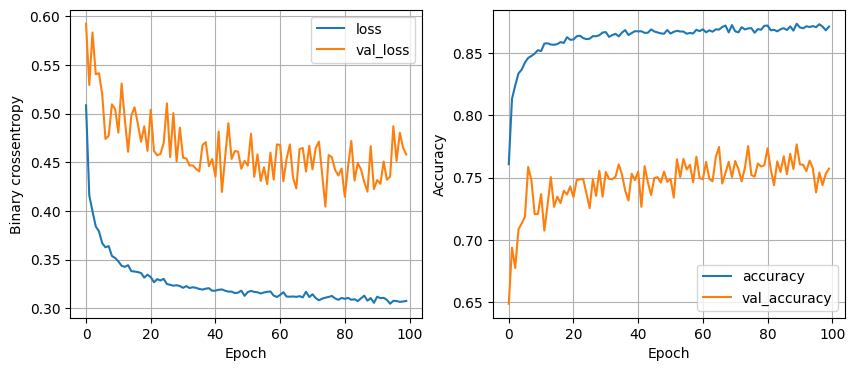

119/119 [==============================] - 0s 961us/step - loss: 0.2915 - accuracy: 0.8796
32 nodes, dropout 0.2, learning rate 0.001, batch size 64


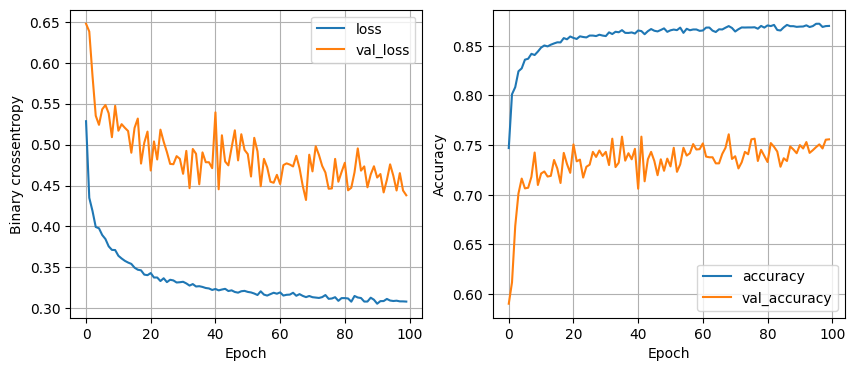

119/119 [==============================] - 0s 949us/step - loss: 0.2927 - accuracy: 0.8785
32 nodes, dropout 0.2, learning rate 0.001, batch size 128


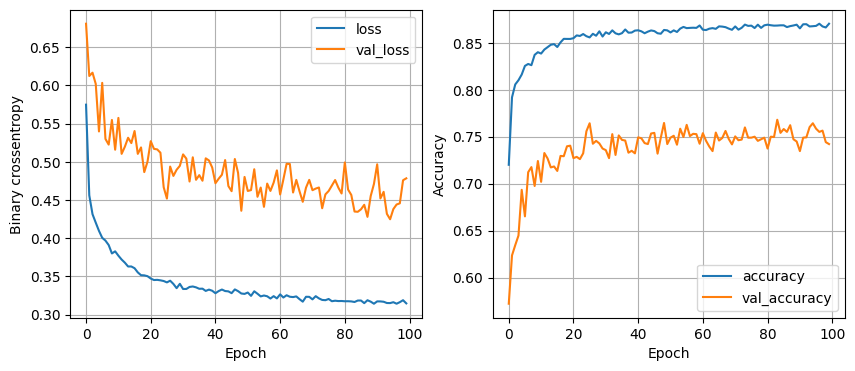

119/119 [==============================] - 0s 951us/step - loss: 0.2911 - accuracy: 0.8825
64 nodes, dropout 0, learning rate 0.01, batch size 32


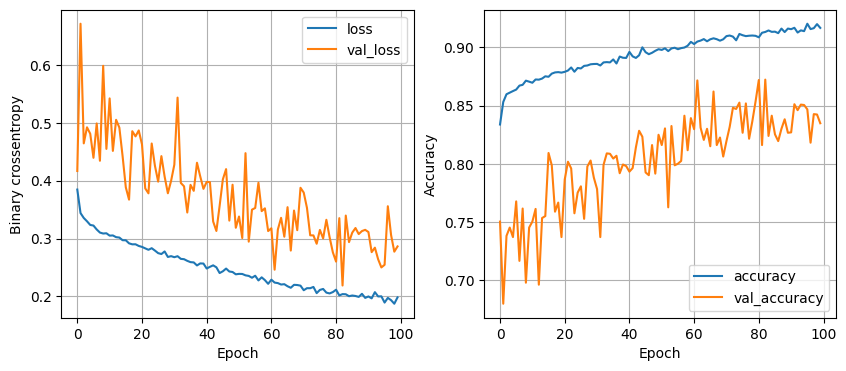

119/119 [==============================] - 0s 965us/step - loss: 0.4330 - accuracy: 0.8717
64 nodes, dropout 0, learning rate 0.01, batch size 64


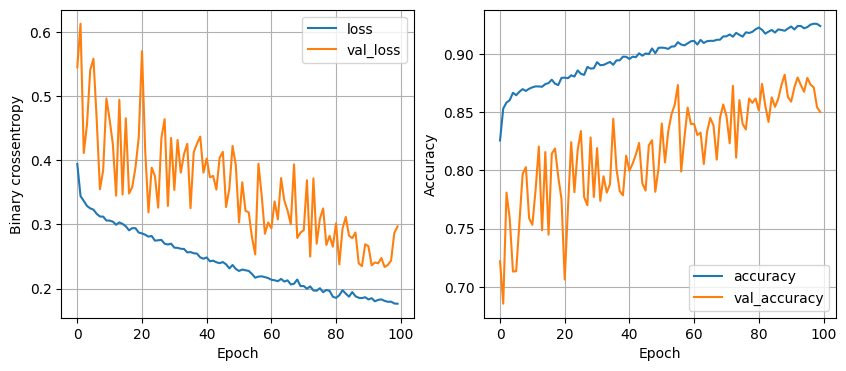

119/119 [==============================] - 0s 975us/step - loss: 0.4837 - accuracy: 0.8644
64 nodes, dropout 0, learning rate 0.01, batch size 128


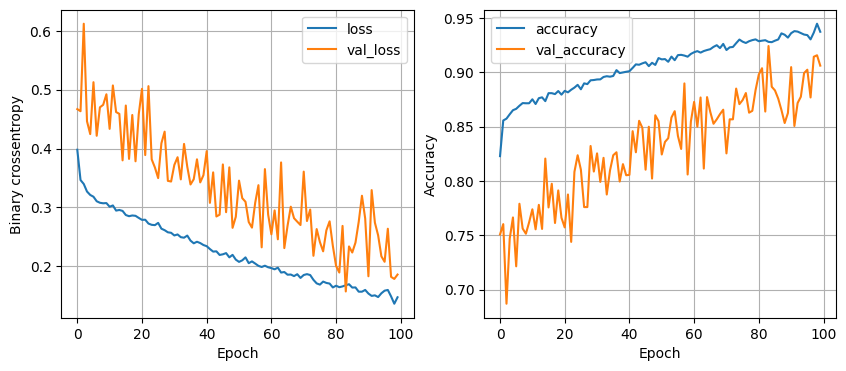

119/119 [==============================] - 0s 1ms/step - loss: 0.5044 - accuracy: 0.8573
64 nodes, dropout 0, learning rate 0.005, batch size 32


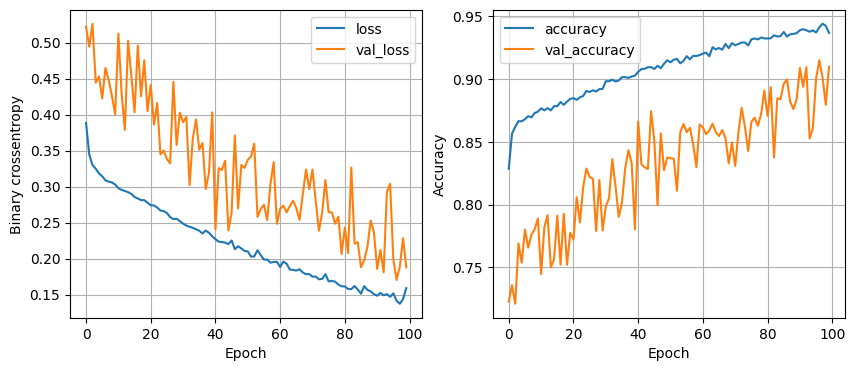

119/119 [==============================] - 0s 1ms/step - loss: 0.5843 - accuracy: 0.8562
64 nodes, dropout 0, learning rate 0.005, batch size 64


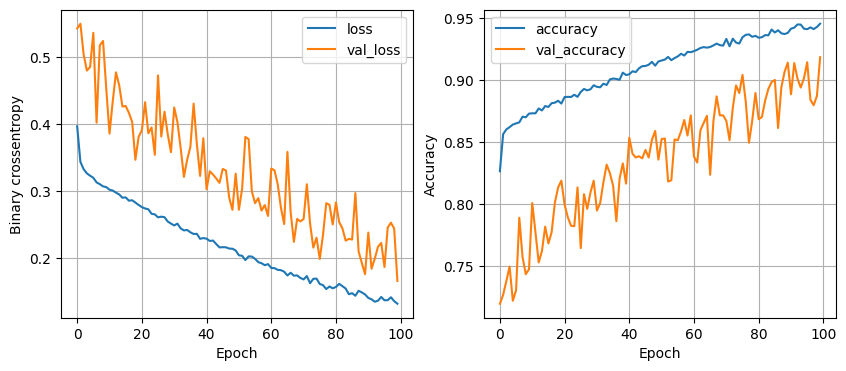

119/119 [==============================] - 0s 963us/step - loss: 0.4992 - accuracy: 0.8486
64 nodes, dropout 0, learning rate 0.005, batch size 128


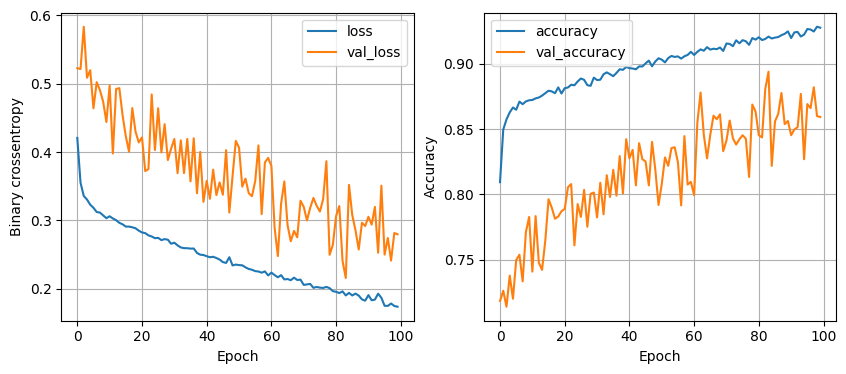

119/119 [==============================] - 0s 967us/step - loss: 0.4178 - accuracy: 0.8604
64 nodes, dropout 0, learning rate 0.001, batch size 32


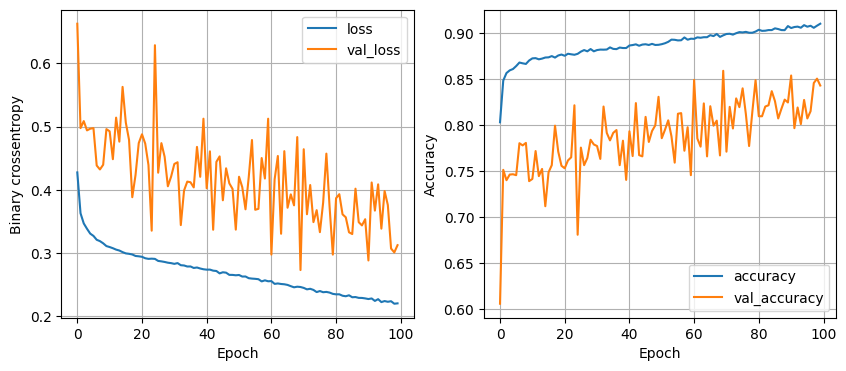

119/119 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8670
64 nodes, dropout 0, learning rate 0.001, batch size 64


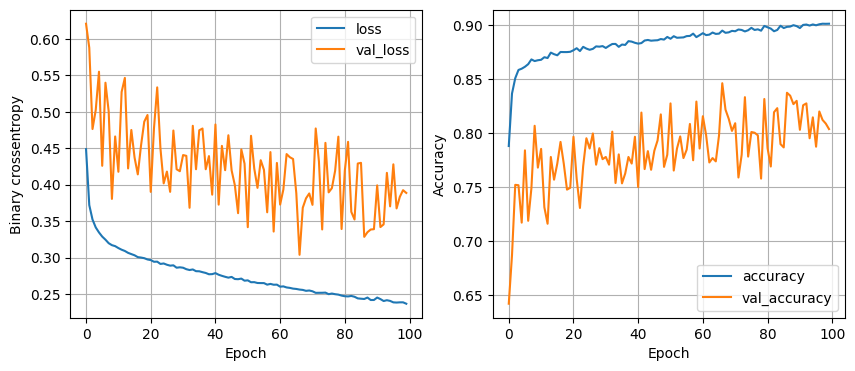

119/119 [==============================] - 0s 963us/step - loss: 0.3002 - accuracy: 0.8780
64 nodes, dropout 0, learning rate 0.001, batch size 128


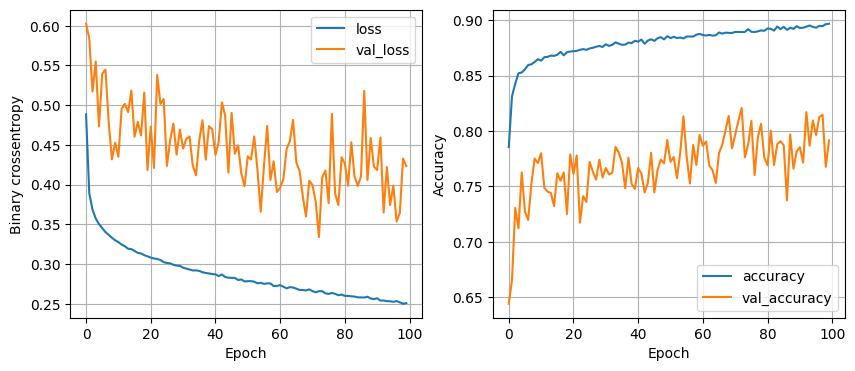

119/119 [==============================] - 0s 965us/step - loss: 0.2985 - accuracy: 0.8775
64 nodes, dropout 0.2, learning rate 0.01, batch size 32


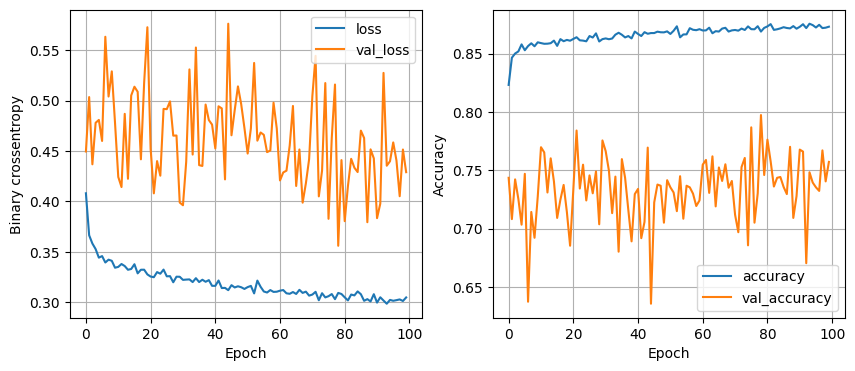

119/119 [==============================] - 0s 971us/step - loss: 0.2959 - accuracy: 0.8828
64 nodes, dropout 0.2, learning rate 0.01, batch size 64


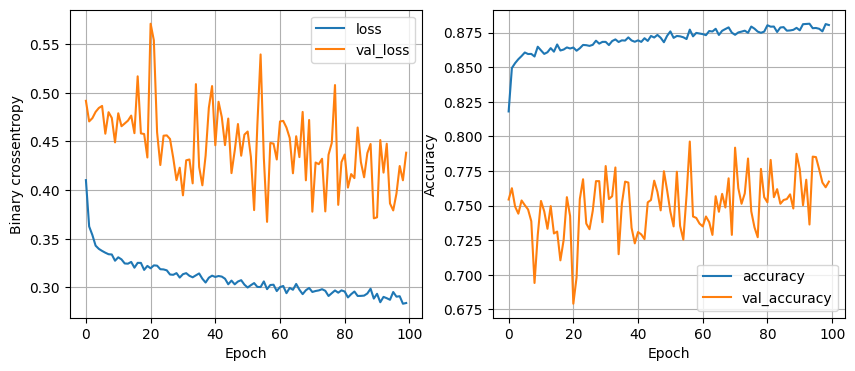

119/119 [==============================] - 0s 1ms/step - loss: 0.2911 - accuracy: 0.8854
64 nodes, dropout 0.2, learning rate 0.01, batch size 128


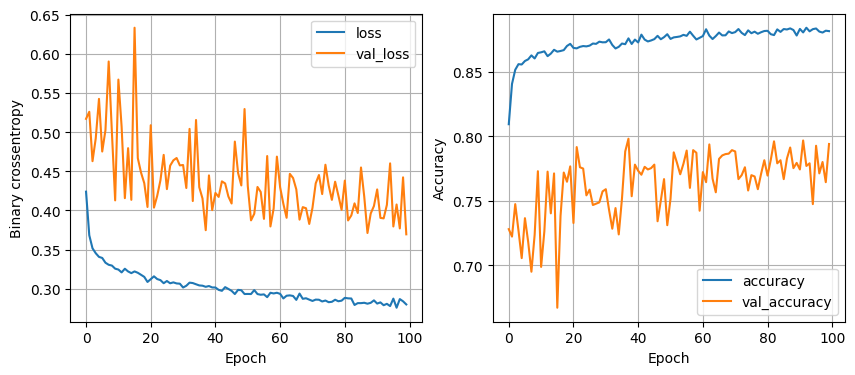

119/119 [==============================] - 0s 960us/step - loss: 0.2935 - accuracy: 0.8820
64 nodes, dropout 0.2, learning rate 0.005, batch size 32


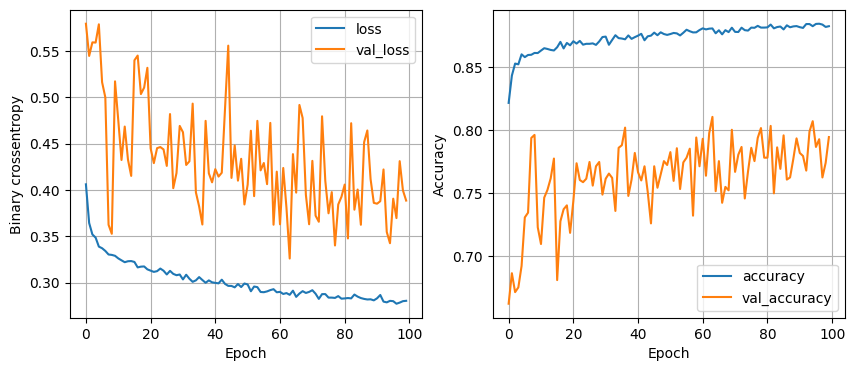

119/119 [==============================] - 0s 1ms/step - loss: 0.2854 - accuracy: 0.8851
64 nodes, dropout 0.2, learning rate 0.005, batch size 64


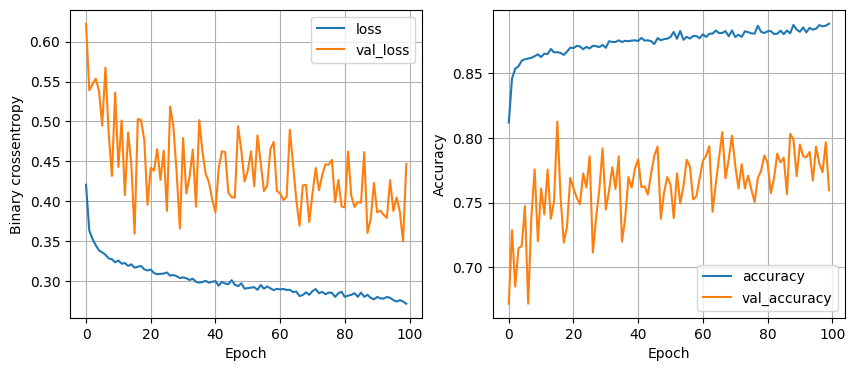

119/119 [==============================] - 0s 971us/step - loss: 0.2824 - accuracy: 0.8846
64 nodes, dropout 0.2, learning rate 0.005, batch size 128


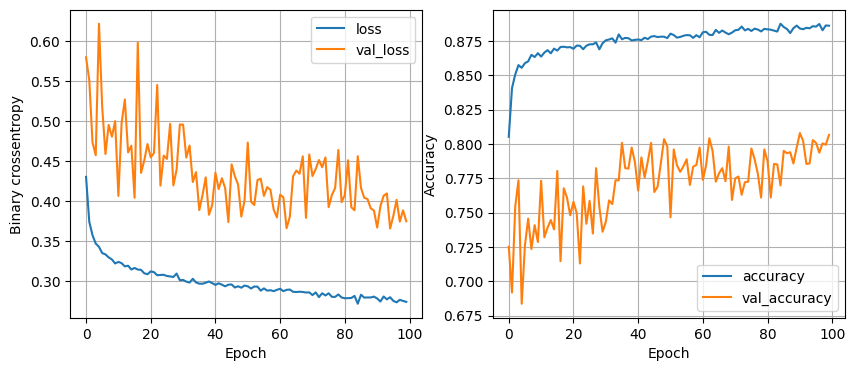

119/119 [==============================] - 0s 972us/step - loss: 0.2849 - accuracy: 0.8799
64 nodes, dropout 0.2, learning rate 0.001, batch size 32


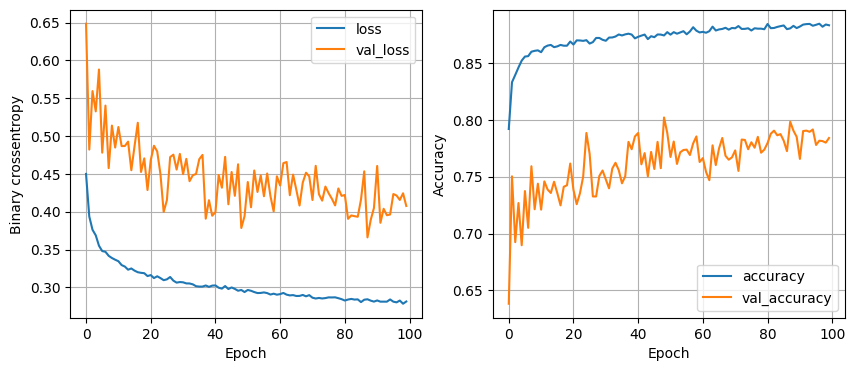

119/119 [==============================] - 0s 969us/step - loss: 0.2815 - accuracy: 0.8833
64 nodes, dropout 0.2, learning rate 0.001, batch size 64


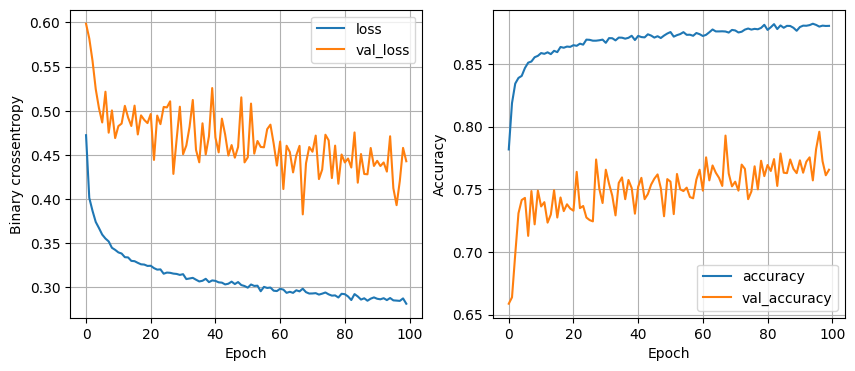

119/119 [==============================] - 0s 955us/step - loss: 0.2828 - accuracy: 0.8820
64 nodes, dropout 0.2, learning rate 0.001, batch size 128


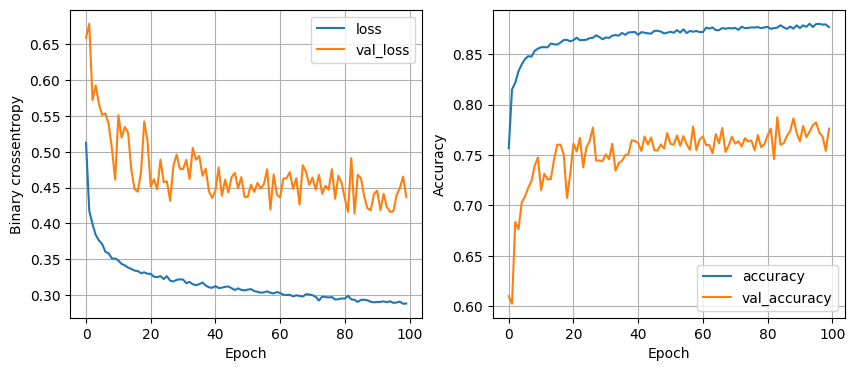

119/119 [==============================] - 0s 975us/step - loss: 0.2802 - accuracy: 0.8830


In [264]:
# Setting hyperparameters for training and possible fine-tuning

#reconding the model with the lowest valiation loss
least_val_loss = float('inf') #setting the initial minimum validation loss to infinity
least_loss_model = None #setting the initial minimum model loss to infinity
epochs = 100 # Setting epochs value

#For loop that tests several different hyperpara,eter values in one go. Useful for fine-tuning
for num_nodes in [16,32,64]: #For num_nodes as these values
    for dropout_prob in [0, 0.2]: #For dropout_prob as these values
        for learning_rate in [0.01, 0.005, 0.001]: #For learning_rate as these values
            for batch_size in [32, 64, 128]: #For batch_size as these values
                print(f"{num_nodes} nodes, dropout {dropout_prob}, learning rate {learning_rate}, batch size {batch_size}")
                model, history = training_model(X_training, y_training, num_nodes, dropout_prob, learning_rate, batch_size, epochs)
                plot_history(history) # Potting the history
                val_loss, *_ = model.evaluate(X_validation, y_validation) # Figuring out the validation loss for original validation data set.
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model